### Task
Compute the edit distance (using insertion cost 1, deletion cost 1, substitution
cost 1) of “leda” to “deal”. Show your work (using the edit distance grid).


4.0


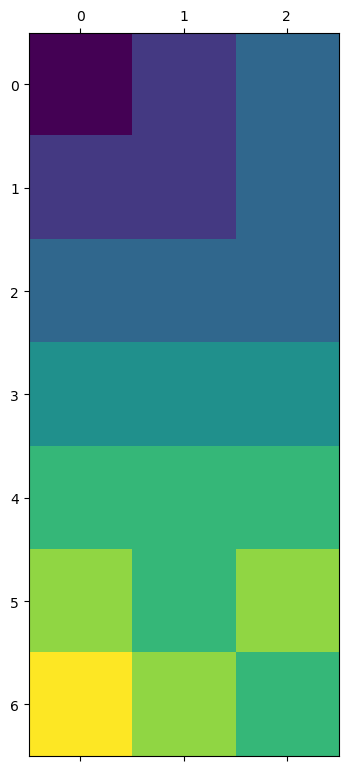

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def min_edit_distance(source, target,
                      insertion:int = 1,
                      deletion:int = 1,
                      substitution:int = 1,
                      show=False) -> int:
    def equality(src, trg, i, j=None) -> int:
        if j: return int(src[i] != trg[j]) 
        else: return int(src[i] != trg[i])
    

    n, m = len(source), len(target)
    distance = np.zeros((n, m))

    for i in range(1, n):
        distance[i][0] = distance[i-1, 0] + deletion
    for j in range(1, m):
        distance[0, j] = distance[0, j-1] + insertion
    
    for i in range(1, n):
        for j in range(1, m):
            distance[i, j] = min(
                distance[i-1,j] + equality(source, target, i, j)*deletion,
                distance[i-1, j-1] + equality(source, target, i, j)*  substitution,
                distance[i, j-1] + equality(source, target, i, j)*insertion
            )    
    if show: plt.matshow(distance)
    return distance[n-1, m-1]

edit_distance = min_edit_distance("casting", "ing", show=True) 
print(edit_distance)

### 2.5 
Figure out whether drive is closer to brief or to divers and what the edit dis-
tance is to each. You may use any version of distance that you like


2.0
2.0


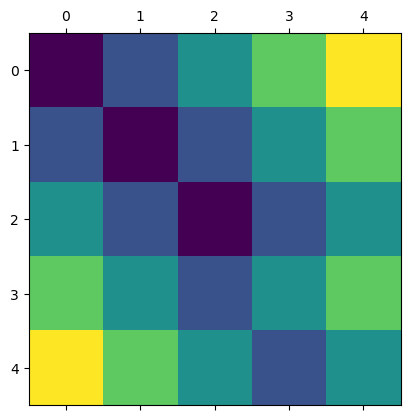

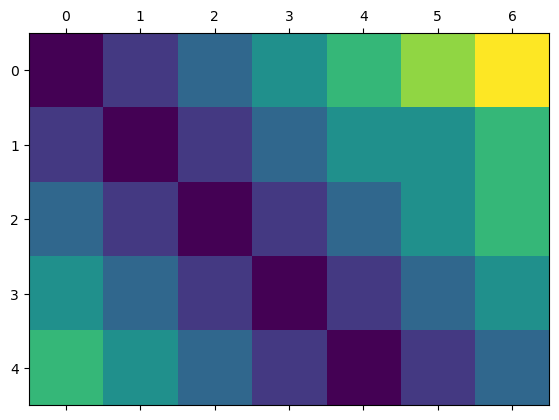

In [75]:
words =  ["drive", "brief", "drivers"]
insertion = 2
deletion = 1
substitution = 4
print(min_edit_distance(words[0], words[1], show=True,
                        insertion=insertion,
                        deletion=deletion,
                        substitution=substitution))
print(min_edit_distance(words[0], words[2], show=True,
                        insertion=insertion,
                        deletion=deletion,
                        substitution=substitution))

In [64]:
def kmp_table(word:str)->list:
    word:list = list(word)
    pos:int = 1 # curr index
    cnd:int = 0
    lenght = len(word)
    t = [0 for i in range(lenght+1)]
    t[0]= -1
    while pos < lenght:
        if word[pos] == word[cnd]:
            t[pos] = t[cnd]
        else:
            t[pos] = cnd
            while cnd >= 0 and word[pos] != word[cnd]:
                cnd = t[cnd]
        pos += 1; cnd += 1
    t[pos] = cnd
    return tв   
    
string = "testing casting"
kmp_table(string)

[-1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, -1, 1, 0, 0, 0]

3.0

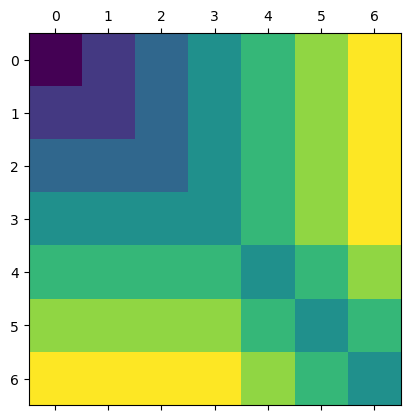

In [73]:
def alligned_levenshtain(a, b):
    a, b = (b, a) if len(b) < len(a) else (a, b)
    table = kmp_table(f"{a} {b}")
    a_table, b_table  = table[:len(a)], table[len(a)+1:-1]
    padding = b_table.index(-1) - a_table.index(-1)
    a = "."*padding+a
    return min_edit_distance(a, b, show=True)
alligned_levenshtain("casting", "ing")